# Интерполяция

### Импорты

In [34]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot  as plt 
from numpy.polynomial import Polynomial as P

## Класс интерполяции

In [64]:
class Interpolation(object):
    def __init__(self, a, b, n, nodes, method, f_or_h, derriv):
        self.a = a
        self.b = b
        self.n = n
        self.nodes = nodes
        self.method = method
        self.f_or_h = f_or_h
        self.derriv = derriv
        
    def f(self, x): 
        if self.f_or_h == 0: 
            return x*x*(np.sin(x**2 - x)) + 1
        else: 
            return abs(x)*(x*x*(np.sin(x**2 - x)) + 1)
    
    def l(self, point_index, x_vec): 
        Lk = P([1])
        for i in range(x_vec.size):
            if(i != point_index):
                Lk = Lk * P([-x_vec[i],1]) / (x_vec[point_index] - x_vec[i])
        return Lk
        
    def make_nodes(self):
        x_arr = np.zeros(self.n)
        if self.nodes == "evenly":
            for i in range(self.n):
                x_arr[i] = self.a + i * abs(self.b-self.a)/(self.n - 1)
        else:
            for i in range (self.n):
                x_arr[i] = 1/2*((self.b - self.a) * np.cos(((2*float(i) + 1) / (2*(float(self.n)))*np.pi)) + (self.b + self.a))
        return x_arr
        
    def make_poly(self, nodes):
        if self.method == 'lagrange':
            lagrange_poly = P([0])
            for i in range(self.n): 
                lagrange_poly += self.f(nodes[i]) * self.l(i, nodes)
            return lagrange_poly
        else: 
            a = np.linalg.lstsq(self.make_hermet_matrix(nodes), self.make_f_vector(nodes))
            print(a[0])
            ermit_poly= P(a[0])
            return ermit_poly
    
    def show_plot(self, poly):
        test_size = 200
        x_test = 2 * np.random.random_sample((test_size)) - 1
        x_test.sort(axis=0)
        f_test = np.apply_along_axis(self.f, 0, x_test)
        f_poly_test = np.apply_along_axis(poly, 0, x_test) 
        error = np.amax(np.absolute(f_test - f_poly_test), axis=0)
        plt.plot(x_test, f_test, label = "original") 
        plt.plot(x_test, f_poly_test, label = self.nodes + " interpolated")
        plt.title('Evenly nodes') 
        plt.xlabel('x') 
        plt.ylabel('y')
        plt.legend() 
        plt.show() 
        print(self.nodes + " maximum error")
        print(error)
        
        
    def make_hermet_row(self, x, flag):
        row = np.zeros((self.derriv +1) * self.n)
        if flag == 1: 
            for i in range(self.n * (self.derriv + 1)):
                row[i] = x**i
        if flag == 2:
            for i in range(self.n * (self.derriv + 1)):
                if x == 0 and i == 0: 
                    row[i] = 0
                else:
                    row[i] = i * x**(i-1)
        if flag == 3:
            for i in range(self.n * (self.derriv + 1)):
                if x == 0 and (i == 0 or i == 1): 
                    row[i] = 0
                else:
                    row[i] = i*(i-1)*x**(i-2)
        return row
        
    def make_hermet_matrix(self, nodes):
        if self.derriv == 1:
            hermet_matrix = np.zeros((2*self.n,2*self.n))
            for i in range(self.n):
                hermet_matrix[i] = self.make_hermet_row(nodes[i], 1)
            for i in range(self.n):
                hermet_matrix[self.n + i] = self.make_hermet_row(nodes[i], 2)
        else: 
            hermet_matrix = np.zeros((3*self.n,3*self.n))
            for i in range(self.n):
                hermet_matrix[i] = self.make_hermet_row(nodes[i], 1)
            for i in range(self.n):
                hermet_matrix[self.n + i] = self.make_hermet_row(nodes[i], 2)
            for i in range(self.n):
                hermet_matrix[(2 * self.n) + i] = self.make_hermet_row(nodes[i], 3)
        np.set_printoptions(precision=3, suppress=True)
        print (hermet_matrix)
        return hermet_matrix
    
    def make_f_vector(self, nodes):
        f_val = np.apply_along_axis(self.f, 0, nodes)
        f_dir = np.zeros(self.n)
        for i in range(self.n):
            f_dir[i] = derivative(self.f, nodes[i], dx=1e-9)
        if self.derriv == 1:
            return np.concatenate((f_val, f_dir), axis=0)
        else: 
            f_dir2 = np.zeros(self.n)
            for i in range(self.n):
                f_dir2[i] = derivative(self.f, nodes[i], dx=1e-6, n=2)
            print (np.concatenate((f_val,f_dir,f_dir2), axis=0) )
            return np.concatenate((f_val,f_dir,f_dir2), axis=0) 
            
    def interpolate(self):
        self.show_plot(self.make_poly(self.make_nodes()))

##  Интерполяция f(x) равномерными узлами и узлами Чебышева

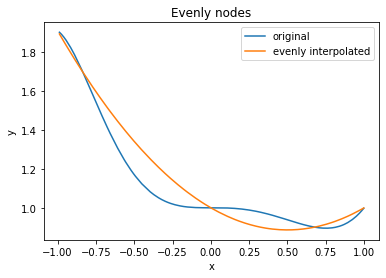

evenly maximum error
0.17371390230297568


In [45]:
a1 = Interpolation(-1, 1, 3, 'evenly', 'lagrange', 0, 0)
a1.interpolate()

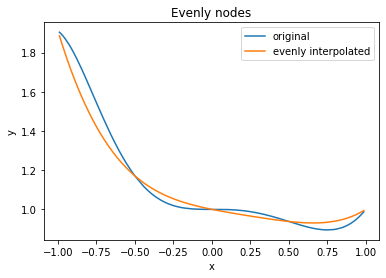

evenly maximum error
0.14167546508019457


In [46]:
a2 = Interpolation(-1, 1, 5, 'evenly', 'lagrange', 0, 0)
a2.interpolate()

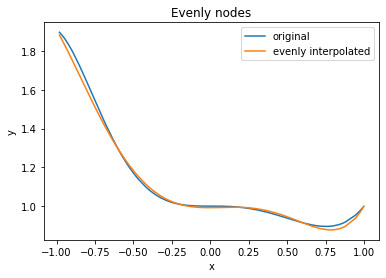

evenly maximum error
0.04960758500676832


In [47]:
a3 = Interpolation(-1, 1, 6, 'evenly', 'lagrange', 0, 0)
a3.interpolate()

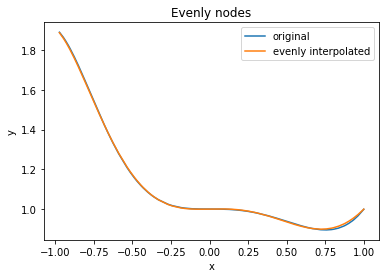

evenly maximum error
0.010701045080945826


In [48]:
a4 = Interpolation(-1, 1, 7, 'evenly', 'lagrange', 0, 0)
a4.interpolate()

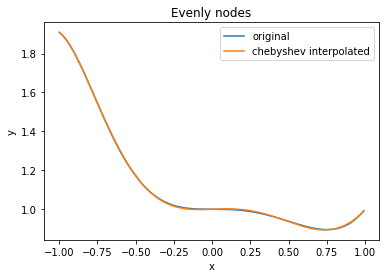

chebyshev maximum error
0.004370757865858388


In [49]:
b = Interpolation(-1, 1, 7, 'chebyshev', 'lagrange', 0, 0)
b.interpolate()

## Интерполяция h(x) равномерными узлами и узлами Чебышева

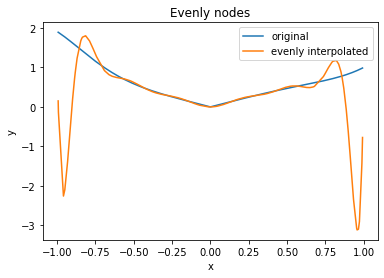

evenly maximum error
4.0516328871946286


In [50]:
c = Interpolation(-1, 1, 15, 'evenly', 'lagrange', 1, 0)
c.interpolate()

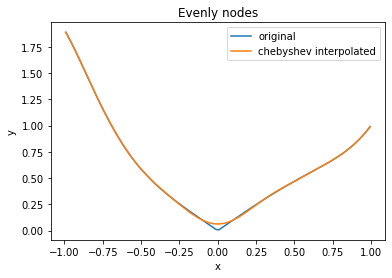

chebyshev maximum error
0.05652426812202621


In [51]:
d = Interpolation(-1, 1, 16, 'chebyshev', 'lagrange', 1, 0)
d.interpolate()

## Интерполяция f(x) полиномом эрмита, равномерными узлами и узлами Чебышева (3 точки)

[[ 1. -1.  1. -1.  1. -1.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.]
 [-0.  1. -2.  3. -4.  5.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  4.  5.]]
[ 1.    -0.     0.517 -1.244 -0.062  0.789]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


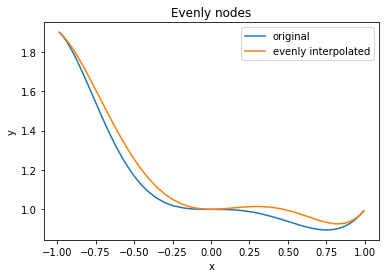

evenly maximum error
0.09080985824566445


In [52]:
e = Interpolation(-1, 1, 3, 'evenly', 'ermit', 0, 1)
e.interpolate()

[[ 1.     0.866  0.75   0.65   0.563  0.487]
 [ 1.     0.     0.     0.     0.     0.   ]
 [ 1.    -0.866  0.75  -0.65   0.563 -0.487]
 [ 0.     1.     1.732  2.25   2.598  2.813]
 [ 0.     1.     0.     0.     0.     0.   ]
 [-0.     1.    -1.732  2.25  -2.598  2.813]]
[ 1.     0.     0.311 -1.178  0.174  0.713]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


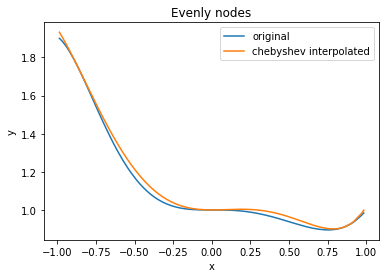

chebyshev maximum error
0.04323439891212777


In [53]:
f = Interpolation(-1, 1, 3, 'chebyshev', 'ermit', 0, 1)
f.interpolate()

## Интерполяция f(x) полиномом эрмита, равномерными узлами и узлами Чебышева (4 точки)

[[ 1.    -1.     1.    -1.     1.    -1.     1.    -1.   ]
 [ 1.    -0.333  0.111 -0.037  0.012 -0.004  0.001 -0.   ]
 [ 1.     0.333  0.111  0.037  0.012  0.004  0.001  0.   ]
 [ 1.     1.     1.     1.     1.     1.     1.     1.   ]
 [-0.     1.    -2.     3.    -4.     5.    -6.     7.   ]
 [-0.     1.    -0.667  0.333 -0.148  0.062 -0.025  0.01 ]
 [ 0.     1.     0.667  0.333  0.148  0.062  0.025  0.01 ]
 [ 0.     1.     2.     3.     4.     5.     6.     7.   ]]
[ 0.999  0.002  0.01  -1.034  0.953  0.364 -0.508  0.213]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


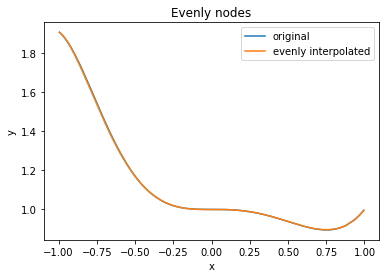

evenly maximum error
0.0076425511928492895


In [54]:
g = Interpolation(-1, 1, 4, 'evenly', 'ermit', 0, 1)
g.interpolate()

[[ 1.     0.924  0.854  0.789  0.729  0.673  0.622  0.575]
 [ 1.     0.383  0.146  0.056  0.021  0.008  0.003  0.001]
 [ 1.    -0.383  0.146 -0.056  0.021 -0.008  0.003 -0.001]
 [ 1.    -0.924  0.854 -0.789  0.729 -0.673  0.622 -0.575]
 [ 0.     1.     1.848  2.561  3.154  3.643  4.039  4.353]
 [ 0.     1.     0.765  0.439  0.224  0.107  0.049  0.022]
 [-0.     1.    -0.765  0.439 -0.224  0.107 -0.049  0.022]
 [-0.     1.    -1.848  2.561 -3.154  3.643 -4.039  4.353]]
[ 1.     0.002  0.007 -1.034  0.98   0.332 -0.533  0.247]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


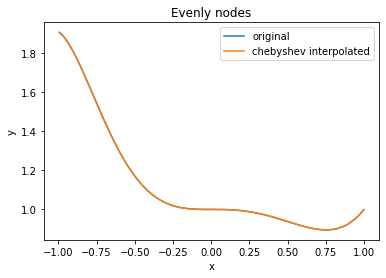

chebyshev maximum error
0.0030551555755171655


In [55]:
h = Interpolation(-1, 1, 4, 'chebyshev', 'ermit', 0, 1)
h.interpolate()

## Интерполяция h(x) полиномом эрмита, равномерными узлами и узлами Чебышева (3 точки)

[[ 1. -1.  1. -1.  1. -1.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.]
 [-0.  1. -2.  3. -4.  5.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  4.  5.]]
[-0.     0.     1.789 -1.017 -0.335  0.562]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


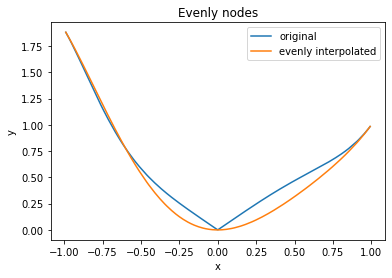

evenly maximum error
0.16718495177610324


In [56]:
i = Interpolation(-1, 1, 3, 'evenly', 'ermit', 1, 1)
i.interpolate()

[[ 1.     0.866  0.75   0.65   0.563  0.487]
 [ 1.     0.     0.     0.     0.     0.   ]
 [ 1.    -0.866  0.75  -0.65   0.563 -0.487]
 [ 0.     1.     1.732  2.25   2.598  2.813]
 [ 0.     1.     0.     0.     0.     0.   ]
 [-0.     1.    -1.732  2.25  -2.598  2.813]]
[-0.     0.     1.81  -0.742 -0.364  0.246]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


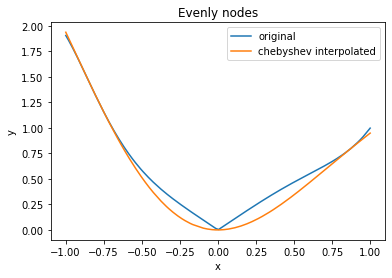

chebyshev maximum error
0.15494691714867231


In [57]:
j = Interpolation(-1, 1, 3, 'chebyshev', 'ermit', 1, 1)
j.interpolate()

## Интерполяция h(x) полиномом эрмита, равномерными узлами и узлами Чебышева (4 точки)

[[ 1.    -1.     1.    -1.     1.    -1.     1.    -1.   ]
 [ 1.    -0.333  0.111 -0.037  0.012 -0.004  0.001 -0.   ]
 [ 1.     0.333  0.111  0.037  0.012  0.004  0.001  0.   ]
 [ 1.     1.     1.     1.     1.     1.     1.     1.   ]
 [-0.     1.    -2.     3.    -4.     5.    -6.     7.   ]
 [-0.     1.    -0.667  0.333 -0.148  0.062 -0.025  0.01 ]
 [ 0.     1.     0.667  0.333  0.148  0.062  0.025  0.01 ]
 [ 0.     1.     2.     3.     4.     5.     6.     7.   ]]
[ 0.154  0.008  1.724 -0.31  -0.664 -0.876  0.241  0.723]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


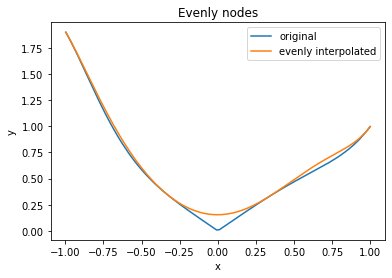

evenly maximum error
0.145146185370016


In [58]:
k = Interpolation(-1, 1, 4, 'evenly', 'ermit', 1, 1)
k.interpolate()

[[ 1.     0.924  0.854  0.789  0.729  0.673  0.622  0.575]
 [ 1.     0.383  0.146  0.056  0.021  0.008  0.003  0.001]
 [ 1.    -0.383  0.146 -0.056  0.021 -0.008  0.003 -0.001]
 [ 1.    -0.924  0.854 -0.789  0.729 -0.673  0.622 -0.575]
 [ 0.     1.     1.848  2.561  3.154  3.643  4.039  4.353]
 [ 0.     1.     0.765  0.439  0.224  0.107  0.049  0.022]
 [-0.     1.    -0.765  0.439 -0.224  0.107 -0.049  0.022]
 [-0.     1.    -1.848  2.561 -3.154  3.643 -4.039  4.353]]
[ 0.17   0.01   1.576 -0.322 -0.552 -0.904  0.272  0.764]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


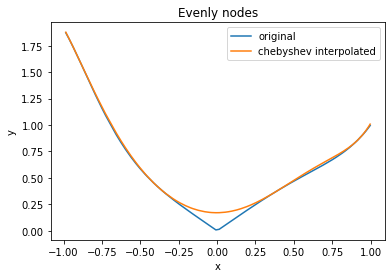

chebyshev maximum error
0.16266184057032956


In [59]:
l = Interpolation(-1, 1, 4, 'chebyshev', 'ermit', 1, 1)
l.interpolate()

## Интерполяция f(x) полиномом эрмита со второй производной, равномерными узлами и узлами Чебышева (3 точки)

[[  1.  -1.   1.  -1.   1.  -1.   1.  -1.   1.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [ -0.   1.  -2.   3.  -4.   5.  -6.   7.  -8.]
 [  0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.]
 [  0.  -0.   2.  -6.  12. -20.  30. -42.  56.]
 [  0.   0.   2.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   2.   6.  12.  20.  30.  42.  56.]]
[ 1.     0.    -0.    -1.148  1.065  0.597 -0.704  0.096  0.094]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


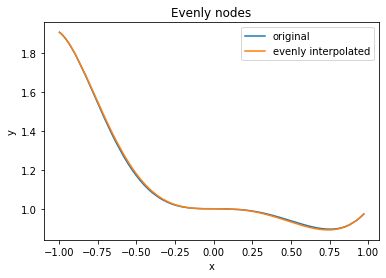

evenly maximum error
0.010674789893428294


In [60]:
m = Interpolation(-1, 1, 3, 'evenly', 'ermit', 0, 2)
m.interpolate()

[[  1.      0.866   0.75    0.65    0.563   0.487   0.422   0.365   0.316]
 [  1.      0.      0.      0.      0.      0.      0.      0.      0.   ]
 [  1.     -0.866   0.75   -0.65    0.563  -0.487   0.422  -0.365   0.316]
 [  0.      1.      1.732   2.25    2.598   2.813   2.923   2.953   2.923]
 [  0.      1.      0.      0.      0.      0.      0.      0.      0.   ]
 [ -0.      1.     -1.732   2.25   -2.598   2.813  -2.923   2.953  -2.923]
 [  0.      0.      2.      5.196   9.     12.99   16.875  20.46   23.625]
 [  0.      0.      2.      0.      0.      0.      0.      0.      0.   ]
 [  0.     -0.      2.     -5.196   9.    -12.99   16.875 -20.46   23.625]]
[ 1.    -0.     0.    -1.06   1.031  0.396 -0.626  0.211  0.049]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


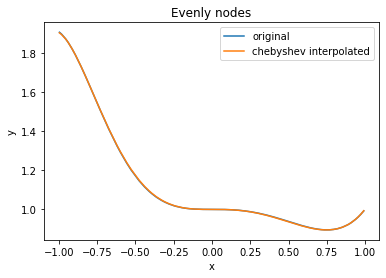

chebyshev maximum error
0.0031239952087549483


In [61]:
n = Interpolation(-1, 1, 3, 'chebyshev', 'ermit', 0, 2)
n.interpolate()

## Интерполяция h(x) полиномом эрмита со второй производной, равномерными узлами и узлами Чебышева (3 точки)

[[  1.  -1.   1.  -1.   1.  -1.   1.  -1.   1.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [ -0.   1.  -2.   3.  -4.   5.  -6.   7.  -8.]
 [  0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.]
 [  0.  -0.   2.  -6.  12. -20.  30. -42.  56.]
 [  0.   0.   2.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   2.   6.  12.  20.  30.  42.  56.]]
[      1.909       0.          1.         -2.479       0.          2.
     -11.051 2000000.          8.   ]
[      -0.          -0.     1000000.          -0.469 -2999995.102
       -0.534  2999994.903        0.548  -999998.346]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


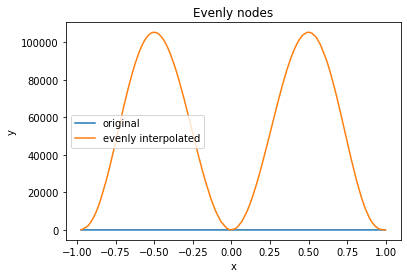

evenly maximum error
105468.40126595604


In [65]:
o = Interpolation(-1, 1, 3, 'evenly', 'ermit', 1, 2)
o.interpolate()

[[  1.      0.866   0.75    0.65    0.563   0.487   0.422   0.365   0.316]
 [  1.      0.      0.      0.      0.      0.      0.      0.      0.   ]
 [  1.     -0.866   0.75   -0.65    0.563  -0.487   0.422  -0.365   0.316]
 [  0.      1.      1.732   2.25    2.598   2.813   2.923   2.953   2.923]
 [  0.      1.      0.      0.      0.      0.      0.      0.      0.   ]
 [ -0.      1.     -1.732   2.25   -2.598   2.813  -2.923   2.953  -2.923]
 [  0.      0.      2.      5.196   9.     12.99   16.875  20.46   23.625]
 [  0.      0.      2.      0.      0.      0.      0.      0.      0.   ]
 [  0.     -0.      2.     -5.196   9.    -12.99   16.875 -20.46   23.625]]
[       0.           0.     1000000.          -0.338 -3999992.87
       -0.831  5333323.003        0.718 -2370365.629]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


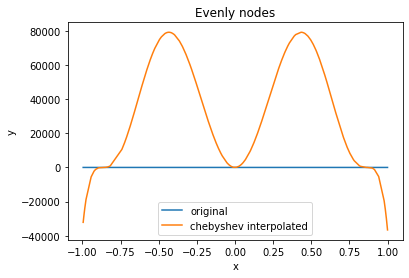

chebyshev maximum error
79101.26178795978


In [63]:
p = Interpolation(-1, 1, 3, 'chebyshev', 'ermit', 1, 2)
p.interpolate()